# Evaluate treatment propensity models

In [250]:
import treatment_propensity_models
import importlib
import evaluation_help_functions
from sklearn.preprocessing import StandardScaler

In [251]:
importlib.reload(treatment_propensity_models)
importlib.reload(evaluation_help_functions)

<module 'evaluation_help_functions' from '/Users/lovhag/Projects/yelp_causal_inference/evaluation_help_functions.py'>

## Get the treatment propensity models

In [252]:
models = {"baseline_model": treatment_propensity_models.get_baseline_model(), 
        "random_forest_model_1": treatment_propensity_models.get_random_forest_model_1(),
        "random_forest_model_2": treatment_propensity_models.get_random_forest_model_2(),
        "random_forest_model_3": treatment_propensity_models.get_random_forest_model_3(),
        "random_forest_model_4": treatment_propensity_models.get_random_forest_model_4(),
        "random_forest_model_5": treatment_propensity_models.get_random_forest_model_5()
        }

## Evaluate the models with cross validation for the test data

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

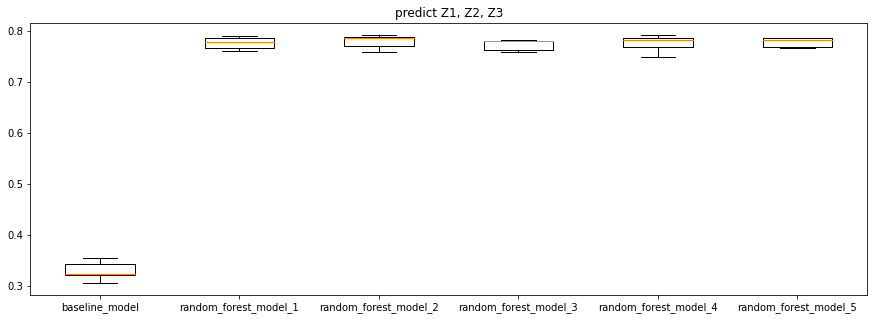

In [253]:
X_cols_cont = ['n_words', 'n_fans', 'n_reviews']
X_cols_cat = ['stars', 'is_positive_sentiment']
X_cols = X_cols_cont+X_cols_cat
Y_cols = ['Z1','Z2', 'Z3']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data = df[df.test==1][X_cols].to_numpy()
Y_data = df[df.test==1][Y_cols]

score_dict = evaluation_help_functions.get_treatment_model_crossval_scores_basic(models, X_data, Y_data)
evaluation_help_functions.plot_model_scores(score_dict, "predict Z1, Z2, Z3")

## Get classification reports for the models

In [254]:
X_cols_cont = ['n_words', 'n_fans', 'n_reviews']
X_cols_cat = ['stars', 'is_positive_sentiment']
X_cols = X_cols_cont+X_cols_cat
Y_cols = ['Z1','Z2', 'Z3']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data = df[df.test==1][X_cols].to_numpy()
Y_data = df[df.test==1][Y_cols].to_numpy()

predictions_dict = evaluation_help_functions.get_treatment_model_crossval_predictions_basic(models, X_data, Y_data)

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

In [255]:
def categorize_y_vals(y_vals):
    categorized_y = []
    for y_val in y_vals:
        categorized_y.append(np.where(np.all(Y_categorical==y_val, axis=1))[0].item())

    return categorized_y

In [256]:
from sklearn.metrics import classification_report
target_names = [str(val) for val in Y_categorical]

for model_name, model in models.items():
    print(f"CLASSIFICATION REPORT {model_name}")
    print(classification_report(categorize_y_vals(Y_data), categorize_y_vals(predictions_dict[model_name]), target_names=target_names))
    print("===========================================")

CLASSIFICATION REPORT baseline_model
              precision    recall  f1-score   support

     [0 0 0]       0.31      0.31      0.31      2542
     [0 0 1]       0.03      0.04      0.04       159
     [0 1 0]       0.47      0.45      0.46      3900
     [0 1 1]       0.03      0.04      0.03       269
     [1 0 0]       0.05      0.05      0.05       468
     [1 0 1]       0.03      0.01      0.01       175
     [1 1 0]       0.06      0.08      0.07       527
     [1 1 1]       0.00      0.00      0.00        53

    accuracy                           0.32      8093
   macro avg       0.12      0.12      0.12      8093
weighted avg       0.33      0.32      0.33      8093

CLASSIFICATION REPORT random_forest_model_1
              precision    recall  f1-score   support

     [0 0 0]       0.74      0.82      0.77      2542
     [0 0 1]       0.37      0.08      0.13       159
     [0 1 0]       0.88      0.92      0.90      3900
     [0 1 1]       0.12      0.00      0.01       2

## Get treatment probabilities for all x

In [257]:
import pandas as pd

In [258]:
df[df.test==1][X_cols].describe()

,n_words,n_fans,n_reviews,stars,is_positive_sentiment
count,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000
mean,139.994687,16.087977,159.807364,3.774373,0.640554
std,129.970251,56.368684,317.321461,1.332973,0.479868
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,52.000000,0.000000,15.000000,3.000000,0.000000
50%,99.000000,1.000000,51.000000,4.000000,1.000000
75%,185.000000,9.000000,168.000000,5.000000,1.000000
max,975.000000,1464.000000,7745.000000,5.000000,1.000000


In [259]:
df[df.test==1].groupby(X_cols).user_id.count()

n_words  n_fans  n_reviews  stars  is_positive_sentiment
1        0       1          1      0.0                      1
                 29         4      0.0                      1
         1       94         5      0.0                      1
5        0       1          1      0.0                      1
                            3      0.0                      1
                                                           ..
937      0       15         3      1.0                      1
940      330     1224       4      0.0                      1
950      1       51         2      0.0                      1
960      1       23         1      0.0                      1
975      10      159        1      0.0                      1
Name: user_id, Length: 7841, dtype: int64

Number of unique contexts

In [260]:
len(df[df.test==1].groupby(X_cols).user_id.count())

7841

### Get prediction probabilities for all treatments

In [274]:
from sklearn.model_selection import cross_val_predict

X_cols_cont = ['n_words', 'n_fans', 'n_reviews']
X_cols_cat = ['stars', 'is_positive_sentiment']
X_cols = X_cols_cont+X_cols_cat
Y_cols = ['Z1','Z2', 'Z3']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data = df[df.test==1][X_cols]
Y_data = df[df.test==1][Y_cols]

pred_prob_dict = {}
for model_name, model in models.items():
    pred_prob_dict[model_name] = cross_val_predict(model, X_data.to_numpy(), Y_data.to_numpy(), cv=5, method='predict_proba')

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

In [275]:
model_prob_results = {}
for model_name in models:
    prob_results = {}
    for index, col in enumerate(Y_cols):
        prob_results[col+"_0"] = []
        prob_results[col+"_1"] = []
        for preds in pred_prob_dict[model_name][index]:
            prob_results[col+"_0"].append(preds[0])
            prob_results[col+"_1"].append(preds[1])
    model_prob_results[model_name] = pd.DataFrame(prob_results)

In [276]:
model_results = pd.concat([model_prob_results['random_forest_model_1'], X_data.reset_index(drop=True)], axis=1)
model_results.head()

,Z1_0,Z1_1,Z2_0,Z2_1,Z3_0,Z3_1,n_words,n_fans,n_reviews,stars,is_positive_sentiment
0,0.827733,0.172267,0.770110,0.229890,0.935007,0.064993,176,0,3,5,1.0
1,0.011532,0.988468,0.820905,0.179095,0.141825,0.858175,940,330,1224,4,0.0
2,0.975778,0.024222,0.924476,0.075524,0.997500,0.002500,131,113,1864,4,1.0
3,1.000000,0.000000,0.002500,0.997500,1.000000,0.000000,63,0,15,5,1.0
4,0.793074,0.206926,0.578265,0.421735,0.803635,0.196365,216,0,8,5,1.0


### Bin the X data in order to get different X regions to check T predict probabilities for

In [280]:
100*100*100*2*5

10000000

In [289]:
6.744+78.44

85.184

In [277]:
standard_nbr_bins = 100
n_bins = {"is_positive_sentiment": 2, "stars": 5, "n_words": standard_nbr_bins, "n_fans": standard_nbr_bins, "n_reviews": standard_nbr_bins}

X_cols_binned = []
for col in X_cols:
    col_name = col+"_binned"
    X_cols_binned.append(col_name)
    model_results[col_name] = pd.cut(model_results[col], n_bins[col])
model_results.head()

,Z1_0,Z1_1,Z2_0,Z2_1,Z3_0,Z3_1,n_words,n_fans,n_reviews,stars,is_positive_sentiment,n_words_binned,n_fans_binned,n_reviews_binned,stars_binned,is_positive_sentiment_binned
0,0.827733,0.172267,0.770110,0.229890,0.935007,0.064993,176,0,3,5,1.0,"(166.58, 176.32]","(-1.464, 14.64]","(-6.744, 78.44]","(4.2, 5.0]","(0.5, 1.0]"
1,0.011532,0.988468,0.820905,0.179095,0.141825,0.858175,940,330,1224,4,0.0,"(936.04, 945.78]","(322.08, 336.72]","(1162.6, 1240.04]","(3.4, 4.2]","(-0.001, 0.5]"
2,0.975778,0.024222,0.924476,0.075524,0.997500,0.002500,131,113,1864,4,1.0,"(127.62, 137.36]","(102.48, 117.12]","(1859.56, 1937.0]","(3.4, 4.2]","(0.5, 1.0]"
3,1.000000,0.000000,0.002500,0.997500,1.000000,0.000000,63,0,15,5,1.0,"(59.44, 69.18]","(-1.464, 14.64]","(-6.744, 78.44]","(4.2, 5.0]","(0.5, 1.0]"
4,0.793074,0.206926,0.578265,0.421735,0.803635,0.196365,216,0,8,5,1.0,"(215.28, 225.02]","(-1.464, 14.64]","(-6.744, 78.44]","(4.2, 5.0]","(0.5, 1.0]"


In [278]:
grouped_model_results = model_results.drop(columns=X_cols).groupby(X_cols_binned, observed=True).mean()
grouped_model_results

Z1_0  \
n_words_binned   n_fans_binned    n_reviews_binned  stars_binned is_positive_sentiment_binned             
(0.026, 10.74]   (-1.464, 14.64]  (-6.744, 78.44]   (0.996, 1.8] (-0.001, 0.5]                 1.000000   
                                                    (1.8, 2.6]   (-0.001, 0.5]                 1.000000   
                                                    (2.6, 3.4]   (-0.001, 0.5]                 0.984000   
                                                                 (0.5, 1.0]                    1.000000   
                                                    (3.4, 4.2]   (-0.001, 0.5]                 1.000000   
...                                                                                                 ...   
(936.04, 945.78] (-1.464, 14.64]  (-6.744, 78.44]   (2.6, 3.4]   (0.5, 1.0]                    0.191905   
                 (322.08, 336.72] (1162.6, 1240.04] (3.4, 4.2]   (-0.001, 0.5]                 0.011532   
(945.78, 955.52] (-1.464, 14.64]  (-6.744, 78.44]   (1.8, 2.6]   (-0.001, 0.5]                 0.032667   
(955.52, 965.26] (-1.464, 14.64]  (-6.744, 78.44]   (0.996, 1.8] (-0.001, 0.5]                 0.019000   
(965.26, 975.0]  (-1.464, 14.64]  (155.88, 233.32]  (0.996, 1.8] (-0.001, 0.5]                 0.065413   

                                                                                                   Z1_1  \
n_words_binned   n_fans_binned    n_reviews_binned  stars_binned is_positive_sentiment_binned             
(0.026, 10.74]   (-1.464, 14.64]  (-6.744, 78.44]   (0.996, 1.8] (-0.001, 0.5]                 0.000000   
                                                    (1.8, 2.6]   (-0.001, 0.5]                 0.000000   
                                                    (2.6, 3.4]   (-0.001, 0.5]                 0.016000   
                                                                 (0.5, 1.0]                    0.000000   
                                                    (3.4, 4.2]   (-0.001, 0.5]                 0.000000   
...                                                                                                 ...   
(936.04, 945.78] (-1.464, 14.64]  (-6.744, 78.44]   (2.6, 3.4]   (0.5, 1.0]                    0.808095   
                 (322.08, 336.72] (1162.6, 1240.04] (3.4, 4.2]   (-0.001, 0.5]                 0.988468   
(945.78, 955.52] (-1.464, 14.64]  (-6.744, 78.44]   (1.8, 2.6]   (-0.001, 0.5]                 0.967333   
(955.52, 965.26] (-1.464, 14.64]  (-6.744, 78.44]   (0.996, 1.8] (-0.001, 0.5]                 0.981000   
(965.26, 975.0]  (-1.464, 14.64]  (155.88, 233.32]  (0.996, 1.8] (-0.001, 0.5]                 0.934587   

                                                                                                   Z2_0  \
n_words_binned   n_fans_binned    n_reviews_binned  stars_binned is_positive_sentiment_binned             
(0.026, 10.74]   (-1.464, 14.64]  (-6.744, 78.44]   (0.996, 1.8] (-0.001, 0.5]                 0.000000   
                                                    (1.8, 2.6]   (-0.001, 0.5]                 0.012182   
                                                    (2.6, 3.4]   (-0.001, 0.5]                 0.006222   
                                                                 (0.5, 1.0]                    0.000000   
                                                    (3.4, 4.2]   (-0.001, 0.5]                 0.005000   
...                                                                                                 ...   
(936.04, 945.78] (-1.464, 14.64]  (-6.744, 78.44]   (2.6, 3.4]   (0.5, 1.0]                    0.851802   
                 (322.08, 336.72] (1162.6, 1240.04] (3.4, 4.2]   (-0.001, 0.5]                 0.820905   
(945.78, 955.52] (-1.464, 14.64]  (-6.744, 78.44]   (1.8, 2.6]   (-0.001, 0.5]                 0.865238   
(955.52, 965.26] (-1.464, 14.64]  (-6.744, 78.44]   (0.996, 1.8] (-0.001, 0.5]                 0.931491   
(965.26, 975.0]  (-1.464, 14.64

### Extract X regions for which the model is super certain

In [279]:
eps = 0.00001
grouped_model_results[((grouped_model_results.Z1_0 == 0) | (grouped_model_results.Z1_0 == 1)) & ((grouped_model_results.Z2_0 == 0) | (grouped_model_results.Z2_0 == 1)) & ((grouped_model_results.Z3_0 == 0) | (grouped_model_results.Z3_0 == 1))]

Z1_0  \
n_words_binned n_fans_binned   n_reviews_binned stars_binned is_positive_sentiment_binned         
(0.026, 10.74] (-1.464, 14.64] (-6.744, 78.44]  (0.996, 1.8] (-0.001, 0.5]                  1.0   
                                                (2.6, 3.4]   (0.5, 1.0]                     1.0   
(10.74, 20.48] (-1.464, 14.64] (78.44, 155.88]  (0.996, 1.8] (-0.001, 0.5]                  1.0   
(20.48, 30.22] (14.64, 29.28]  (155.88, 233.32] (4.2, 5.0]   (0.5, 1.0]                     1.0   
                               (388.2, 465.64]  (3.4, 4.2]   (0.5, 1.0]                     1.0   
                               (620.52, 697.96] (4.2, 5.0]   (0.5, 1.0]                     1.0   
(30.22, 39.96] (-1.464, 14.64] (78.44, 155.88]  (3.4, 4.2]   (-0.001, 0.5]                  1.0   
                               (155.88, 233.32] (1.8, 2.6]   (-0.001, 0.5]                  1.0   
                               (310.76, 388.2]  (3.4, 4.2]   (0.5, 1.0]                     1.0   
                               (388.2, 465.64]  (3.4, 4.2]   (0.5, 1.0]                     1.0   
(39.96, 49.7]  (29.28, 43.92]  (775.4, 852.84]  (4.2, 5.0]   (0.5, 1.0]                     1.0   

                                                                                           Z1_1  \
n_words_binned n_fans_binned   n_reviews_binned stars_binned is_positive_sentiment_binned         
(0.026, 10.74] (-1.464, 14.64] (-6.744, 78.44]  (0.996, 1.8] (-0.001, 0.5]                  0.0   
                                                (2.6, 3.4]   (0.5, 1.0]                     0.0   
(10.74, 20.48] (-1.464, 14.64] (78.44, 155.88]  (0.996, 1.8] (-0.001, 0.5]                  0.0   
(20.48, 30.22] (14.64, 29.28]  (155.88, 233.32] (4.2, 5.0]   (0.5, 1.0]                     0.0   
                               (388.2, 465.64]  (3.4, 4.2]   (0.5, 1.0]                     0.0   
                               (620.52, 697.96] (4.2, 5.0]   (0.5, 1.0]                     0.0   
(30.22, 39.96] (-1.464, 14.64] (78.44, 155.88]  (3.4, 4.2]   (-0.001, 0.5]                  0.0   
                               (155.88, 233.32] (1.8, 2.6]   (-0.001, 0.5]                  0.0   
                               (310.76, 388.2]  (3.4, 4.2]   (0.5, 1.0]                     0.0   
                               (388.2, 465.64]  (3.4, 4.2]   (0.5, 1.0]                     0.0   
(39.96, 49.7]  (29.28, 43.92]  (775.4, 852.84]  (4.2, 5.0]   (0.5, 1.0]                     0.0   

                                                                                           Z2_0  \
n_words_binned n_fans_binned   n_reviews_binned stars_binned is_positive_sentiment_binned         
(0.026, 10.74] (-1.464, 14.64] (-6.744, 78.44]  (0.996, 1.8] (-0.001, 0.5]                  0.0   
                                                (2.6, 3.4]   (0.5, 1.0]                     0.0   
(10.74, 20.48] (-1.464, 14.64] (78.44, 155.88]  (0.996, 1.8] (-0.001, 0.5]                  0.0   
(20.48, 30.22] (14.64, 29.28]  (155.88, 233.32] (4.2, 5.0]   (0.5, 1.0]                     0.0   
                               (388.2, 465.64]  (3.4, 4.2]   (0.5, 1.0]                     0.0   
                               (620.52, 697.96] (4.2, 5.0]   (0.5, 1.0]                     0.0   
(30.22, 39.96] (-1.464, 14.64] (78.44, 155.88]  (3.4, 4.2]   (-0.001, 0.5]                  0.0   
                               (155.88, 233.32] (1.8, 2.6]   (-0.001, 0.5]                  0.0   
                               (310.76, 388.2]  (3.4, 4.2]   (0.5, 1.0]                     0.0   
                               (388.2, 465.64]  (3.4, 4.2]   (0.5, 1.0]                     0.0   
(39.96, 49.7]  (29.28, 43.92]  (775.4, 852.84]  (4.2, 5.0]   (0.5, 1.0]                     0.0   

                                                                                           Z2_1  \
n_words_binned n_fans_binned   n_reviews_binned stars_binned is_positive_sentiment_binned         
(0.026, 10.74] (-1.464, 14.64

### Get the most important context features for treatment prediciton

In [268]:
def get_feature_importances(model, X_data, Y_data):
    model = model.fit(X_data, Y_data)
    return model.feature_importances_

def get_top_k_feature_importances(feature_importances, k):
    args_descending = np.argsort(-feature_importances)
    return args_descending[:k]

In [282]:
f_imp

array([0.70761366, 0.10592225, 0.13983472, 0.03456515, 0.01206422])

In [281]:
X_cols_cont = ['n_words', 'n_fans', 'n_reviews']
X_cols_cat = ['stars', 'is_positive_sentiment']
X_cols = X_cols_cont+X_cols_cat
Y_cols = ['Z1','Z2', 'Z3']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data = df[df.test==1][X_cols].to_numpy()
Y_data = df[df.test==1][Y_cols].to_numpy()

f_imp = get_feature_importances(models['random_forest_model_1'], X_data, Y_data)
imp_cols = {col: f_imp[index] for index, col in enumerate(X_cols)}
imp_cols

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

{'n_words': 0.7076136568060039,
 'n_fans': 0.10592224721169362,
 'n_reviews': 0.13983472299990005,
 'stars': 0.03456515301806298,
 'is_positive_sentiment': 0.012064219964339432}